In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./linkdin_Job_data.csv")
data = data.drop(columns= ['job_ID', 'company_id', 'posted_day_ago', 'alumni', 'Hiring_person', 'hiring_person_link', 'Column1'], axis = 1)

# DATA ANALYSIS

In [291]:
# Verificar si los valores de la columna 'no_of_application' son numéricos
data['no_of_application'] = pd.to_numeric(data['no_of_application'], errors='coerce')

# Eliminar los registros que no son valores numéricos
data = data.dropna(subset=['no_of_application'])

In [292]:
data.head(30)

,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers,job_details
0,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200.0,"5,395,547 followers",About the job Crossover is the world's #1 sour...
1,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184.0,"5,395,547 followers",About the job Crossover is the world's #1 sour...
2,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200.0,NaN,About the job Profile: ML EngineersExperience:...
3,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200.0,"2,094 followers",About the job Designation: Data AnalystLocatio...
4,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8.0,NaN,About the job The ideal candidate will use the...
5,Data Analyst,"Gurugram, Haryana, India",airtel,On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200.0,"972,657 followers",About the job The ideal candidate will use the...
6,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200.0,"5,395,546 followers",About the job Crossover is the world's #1 sour...
7,Shopify Developer,"Delhi, India",Digital Impressions,On-site,Full-time,51-200 employees,2.0,"1,045 followers",About the job The ideal candidate will be resp...
8,Database Developer,"Gurugram, Haryana, India",Kline & Company,Hybrid,Full-time,201-500 employees,7.0,"30,319 followers",About the job Are you an experienced Microsoft...
10,Shopify Developer,"Noida, Uttar Pradesh, India",Unitalks Technologies,Remote,Full-time,11-50 employees,22.0,"4,780 followers",About the job Create an engaging and knowledge...


In [293]:
print(f"Hay {data.shape[0]} filas y {data.shape[1]} columnas\n")
print(data.info())

Hay 3649 filas y 9 columnas

<class 'pandas.core.frame.DataFrame'>
Index: 3649 entries, 0 to 7926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job                 3649 non-null   object 
 1   location            3649 non-null   object 
 2   company_name        3648 non-null   object 
 3   work_type           3572 non-null   object 
 4   full_time_remote    3645 non-null   object 
 5   no_of_employ        3534 non-null   object 
 6   no_of_application   3649 non-null   float64
 7   linkedin_followers  2365 non-null   object 
 8   job_details         3640 non-null   object 
dtypes: float64(1), object(8)
memory usage: 285.1+ KB
None


In [294]:
data.describe()

,no_of_application
count,3649.000000
mean,60.376267
std,69.661341
min,1.000000
25%,8.000000
50%,25.000000
75%,98.000000
max,200.000000


In [295]:
data.isnull().sum()

job                      0
location                 0
company_name             1
work_type               77
full_time_remote         4
no_of_employ           115
no_of_application        0
linkedin_followers    1284
job_details              9
dtype: int64

# Análisis General

In [296]:
data.job.value_counts()

job
Business Analyst                                          99
Data Engineer                                             72
Data Analyst                                              51
Salesforce Developer                                      40
Senior Business Analyst                                   39
                                                          ..
Cloud FinOps Analyst                                       1
HR & Recruiter Intern                                      1
Senior Analyst- Investment Banking                         1
Staff Electrical Engineer (Power Electronics Hardware)     1
Power train function developer                             1
Name: count, Length: 1922, dtype: int64

<Axes: title={'center': 'Principales 15 Empleos en LinkedIn'}, xlabel='job', ylabel='Número de empleos'>

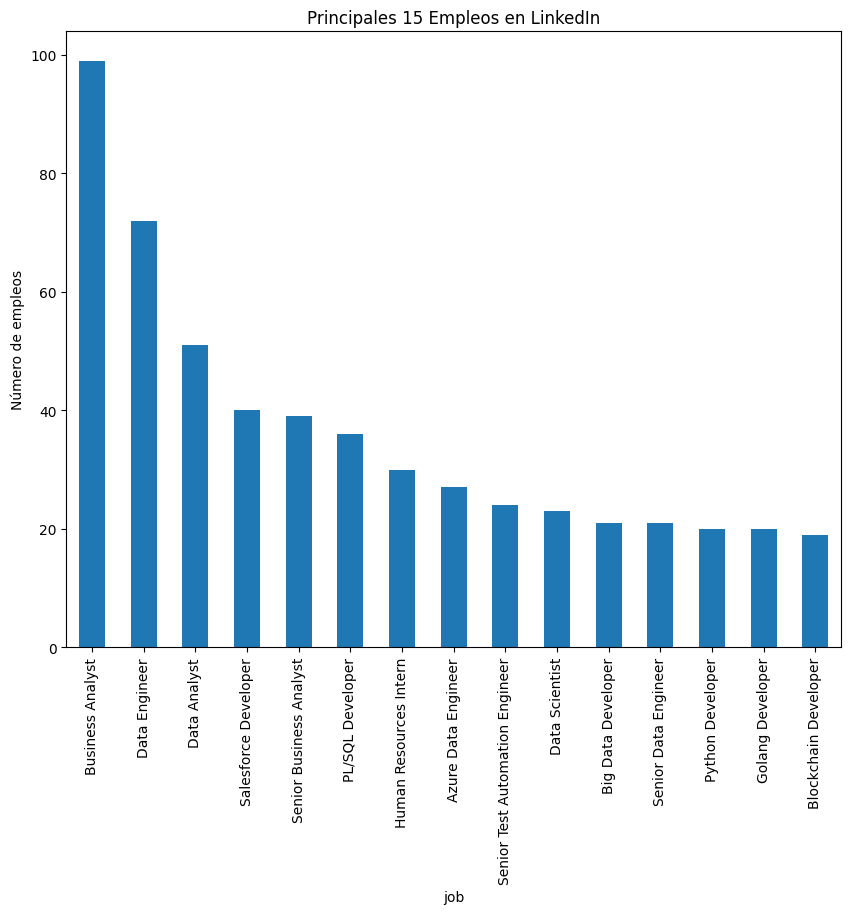

In [297]:
plt.title("Principales 15 Empleos en LinkedIn")
plt.xlabel("Nombre del trabajo")
plt.ylabel("Número de empleos")
(data.job.value_counts()[:15]).plot(kind = 'bar', figsize = (10,8))

<Axes: title={'center': 'Lugares con mayor fuente de empleos en LinkedIn'}, xlabel='location', ylabel='Número de empleos'>

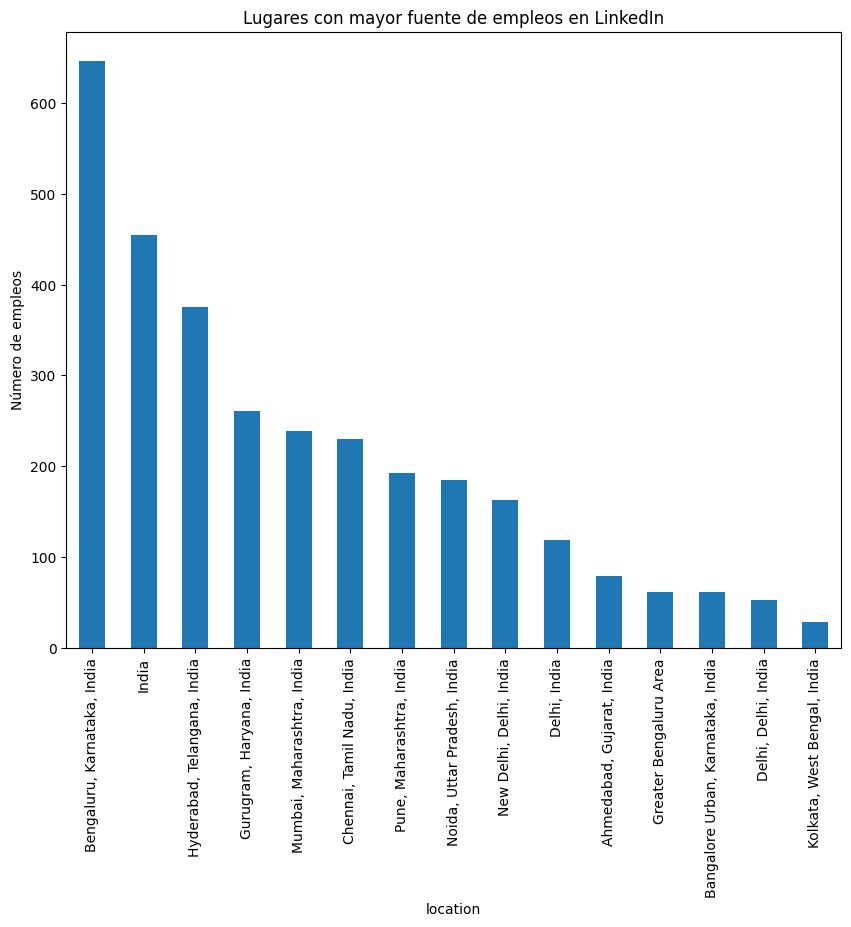

In [298]:
plt.title("Lugares con mayor fuente de empleos en LinkedIn")
plt.xlabel("Nombre del trabajo")
plt.ylabel("Número de empleos")
(data.location.value_counts()[:15]).plot(kind = 'bar', figsize = (10,8))

In [299]:
data.work_type.value_counts()

work_type
On-site    1766
Remote      980
Hybrid      826
Name: count, dtype: int64

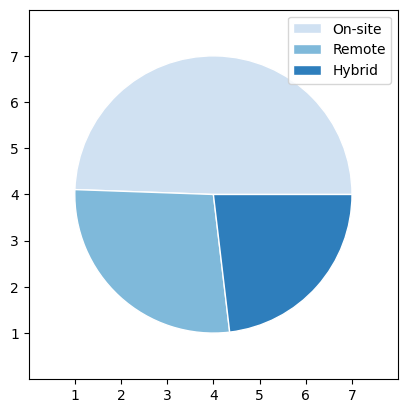

In [300]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(data.work_type.value_counts())))

# plot
fig, ax = plt.subplots()
pie = ax.pie(data.work_type.value_counts(), colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

# Add labels
labels = data.work_type.value_counts().index.tolist()
ax.legend(pie[0], labels, loc="best")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

<Axes: title={'center': 'Densidad del número de aplicaciones en general'}, xlabel='no_of_application', ylabel='Count'>

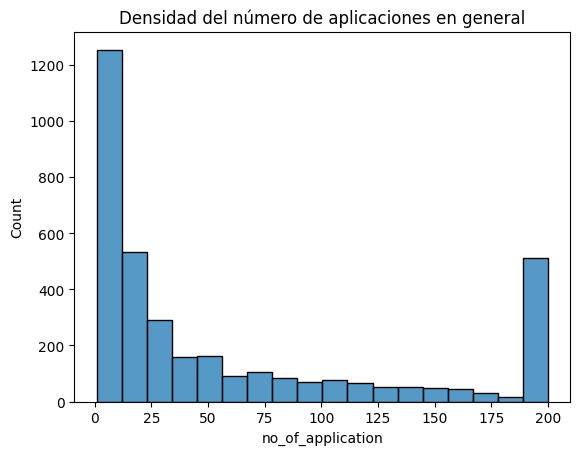

In [301]:
plt.title("Densidad del número de aplicaciones en general")
sns.histplot(data['no_of_application'])

In [302]:
# Vamos a analizar los empleos más demandados

# Obtener los valores únicos de la columna "job"
unique_jobs = data['job'].unique()

# Crear un nuevo dataframe con los valores únicos de la columna "job"
unique_jobs_df = pd.DataFrame({'job': unique_jobs, 'Aplicaciones Totales': 0})

# Sumar las aplicaciones totales para cada empleo
for i in range(len(unique_jobs_df)):
    job = unique_jobs_df.loc[i, 'job']
    total_applications = data.loc[data['job'] == job, 'no_of_application'].sum()
    unique_jobs_df.loc[i, 'Aplicaciones Totales'] = total_applications

# Ordenar el dataframe por la columna "Aplicaciones Totales" de forma descendente
unique_jobs_df = unique_jobs_df.sort_values(by='Aplicaciones Totales', ascending=False)

# Imprimir el dataframe ordenado
unique_jobs_df.head(10)

,job,Aplicaciones Totales
320,Business Analyst,12381
2,Data Analyst,8865
5,Data Engineer,6799
29,PL/SQL Developer,5118
137,Data Scientist,3667
20,Salesforce Developer,3192
0,"Data Analyst, Trilogy (Remote) - $60,000/year USD",3184
322,Senior Business Analyst,3129
487,Python Developer,2478
196,Senior Data Analyst,2164


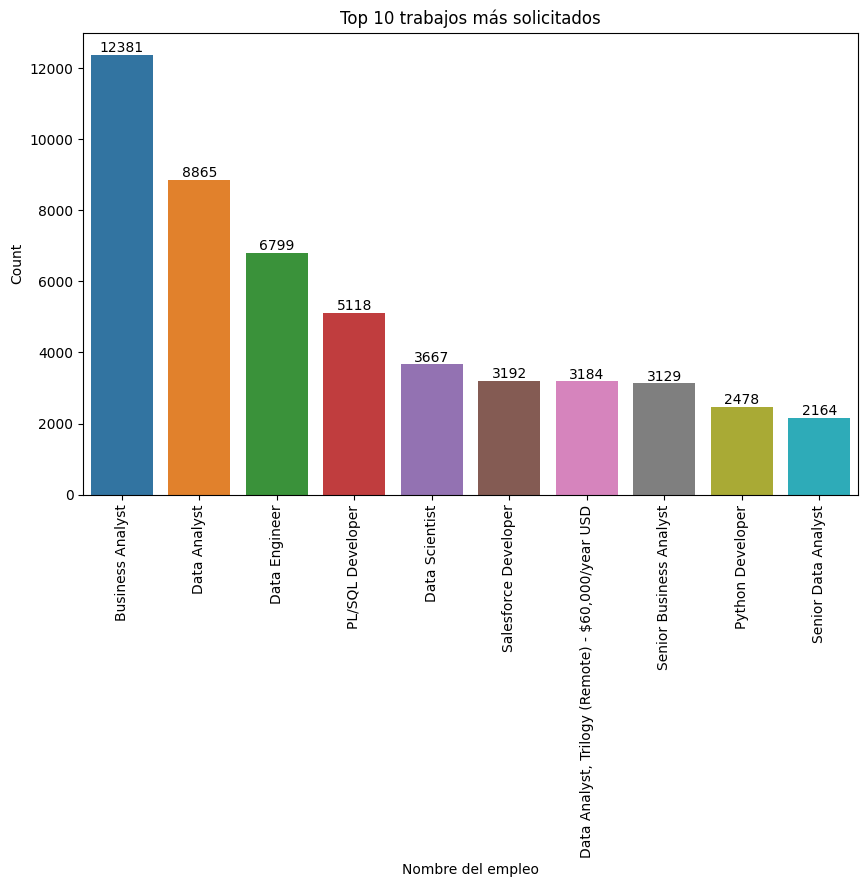

In [303]:
plt.figure(figsize=(10, 6))
sns.barplot(data = unique_jobs_df.head(10), x = 'job', y = 'Aplicaciones Totales')
plt.xlabel('Nombre del empleo')
plt.ylabel('Count')
plt.title('Top 10 trabajos más solicitados')

for i, v in enumerate(unique_jobs_df['Aplicaciones Totales'].head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.show()

In [304]:
data.no_of_employ.value_counts().head(10)

no_of_employ
10,001+ employees · IT Services and IT Consulting        534
11-50 employees                                          507
1,001-5,000 employees · IT Services and IT Consulting    465
51-200 employees                                         383
1-10 employees                                           158
201-500 employees                                        151
1,001-5,000 employees                                    118
501-1,000 employees                                       76
51-200 employees · IT Services and IT Consulting          57
501-1,000 employees · IT Services and IT Consulting       51
Name: count, dtype: int64

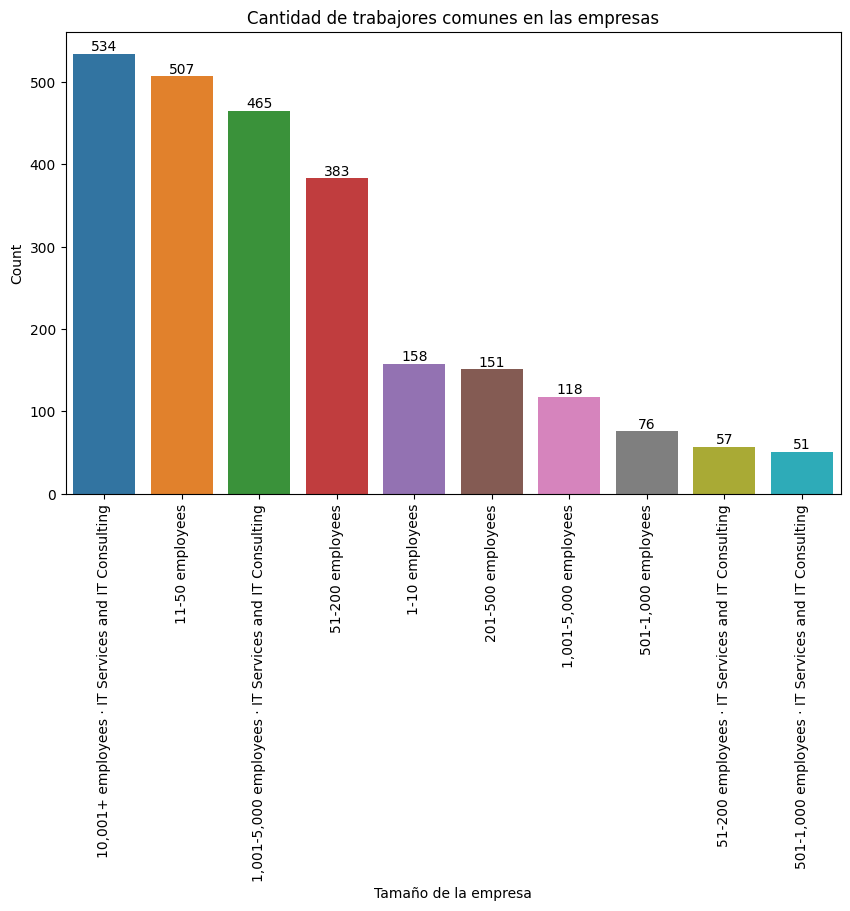

In [305]:
plt.figure(figsize=(10, 6))
sns.barplot(x = data.no_of_employ.value_counts().index[:10], y = data.no_of_employ.value_counts().values[:10])
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Count')
plt.title('Cantidad de trabajores comunes en las empresas')

for i, v in enumerate(data.no_of_employ.value_counts().head(10)):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=90)
plt.show()

## Análisis de los empleos más ofertados

### Business Analyst

<Axes: title={'center': 'Aplicaciones para el puesto Business Analyst'}, xlabel='no_of_application', ylabel='Count'>

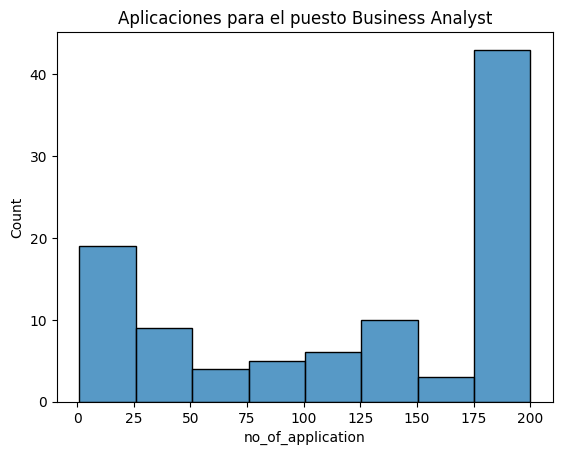

In [306]:
ba_df = data[data.job == "Business Analyst"]
plt.title("Aplicaciones para el puesto Business Analyst")
sns.histplot(ba_df['no_of_application'])

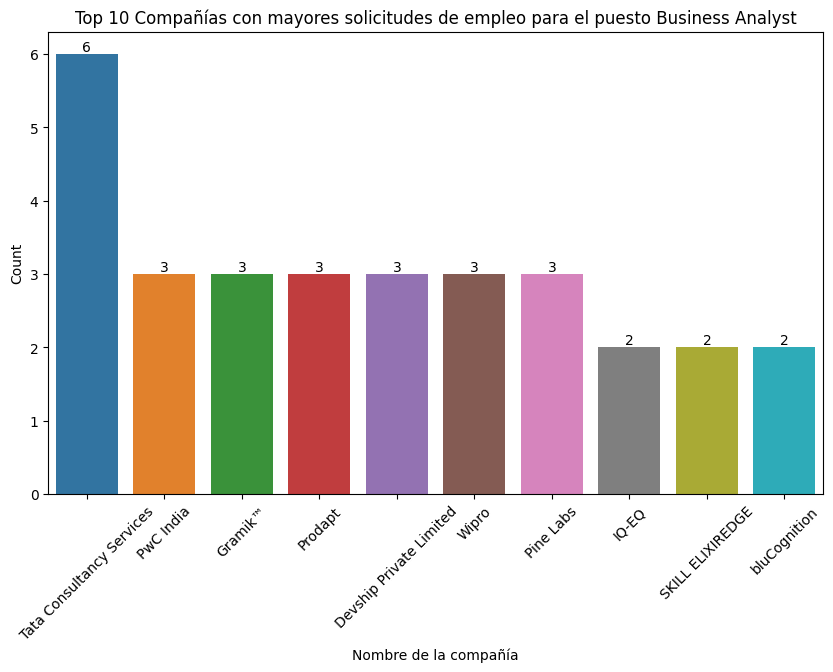

In [307]:
ba_company_counts = ba_df['company_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_company_counts.index, y=ba_company_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo para el puesto Business Analyst')

for i, v in enumerate(ba_company_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=45)
plt.show()

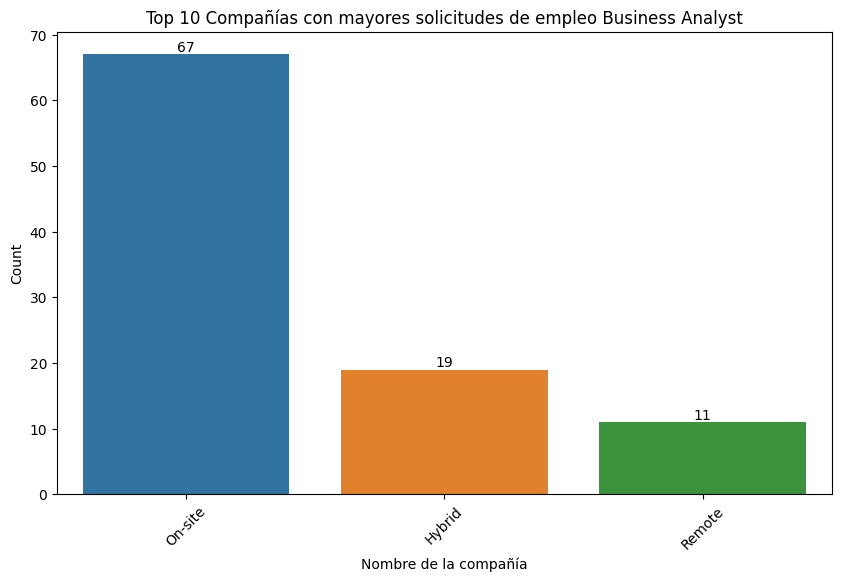

In [308]:
ba_work_type_counts = ba_df['work_type'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_work_type_counts.index, y=ba_work_type_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo Business Analyst')

for i, v in enumerate(ba_work_type_counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.xticks(rotation=45)
plt.show()

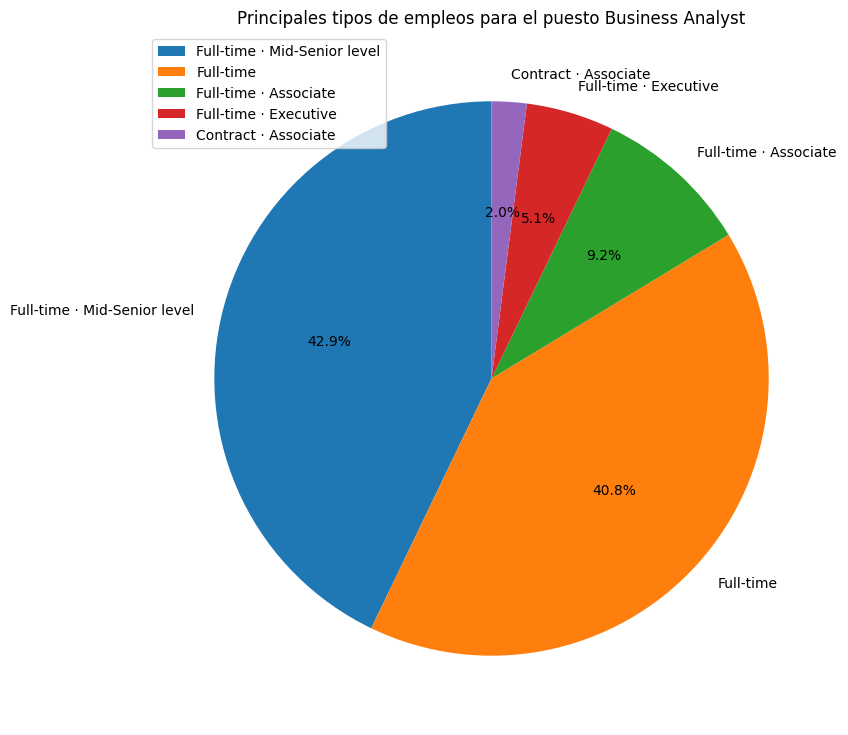

In [309]:
# Obtener los valores y las frecuencias de los tipos de empleo
values_ba = ba_df.full_time_remote.value_counts().head(5).values
labels_ba = ba_df.full_time_remote.value_counts().head(5).index

# Crear la gráfica de pastel
plt.figure(figsize=(9, 9))  # Tamaño de la gráfica
plt.pie(values_ba, labels=labels_ba, autopct='%1.1f%%', startangle=90)

# Agregar título y leyenda
plt.title('Principales tipos de empleos para el puesto Business Analyst')
plt.legend(loc = 'upper left')

# Mostrar la gráfica de pastel
plt.show()

### Data Engineer

<Axes: title={'center': 'Aplicaciones para el puesto Data Engineer'}, xlabel='Número de solicitudes', ylabel='Count'>

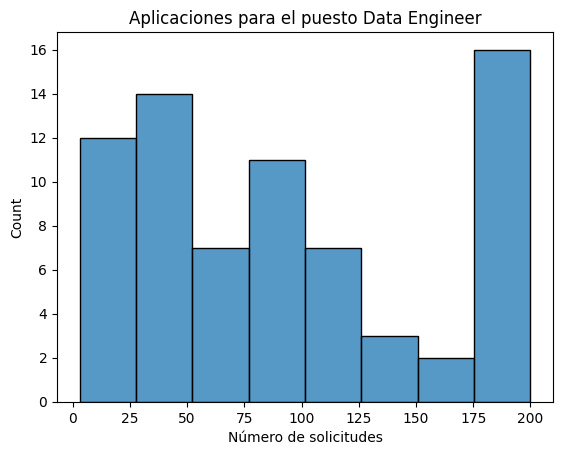

In [310]:
de_df = data[data.job == "Data Engineer"]
plt.title("Aplicaciones para el puesto Data Engineer")
plt.xlabel("Número de solicitudes")
sns.histplot(de_df['no_of_application'])

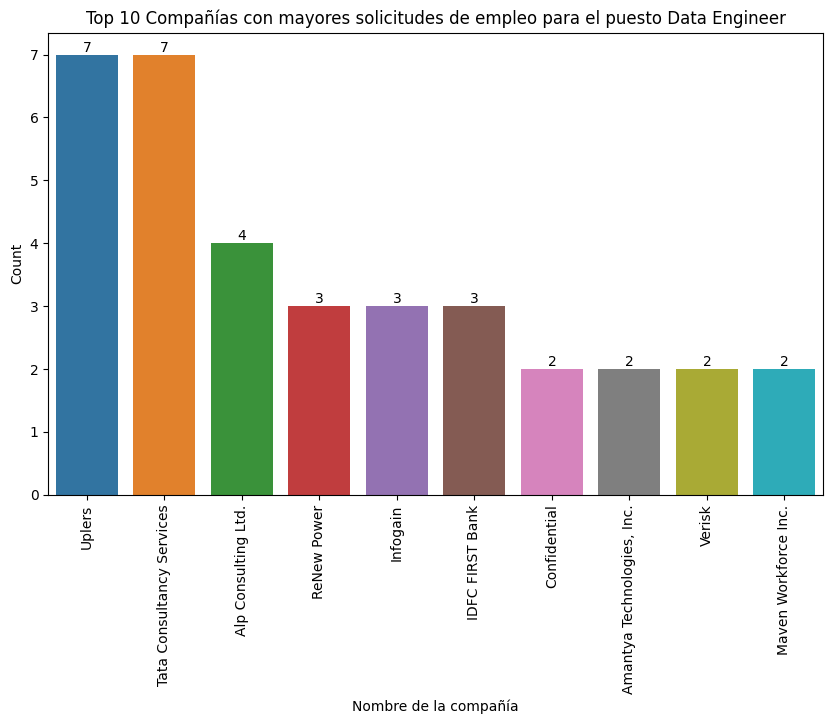

In [311]:
de_company_counts = de_df['company_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=de_company_counts.index, y=de_company_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo para el puesto Data Engineer')

for i, v in enumerate(de_company_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)
plt.show()

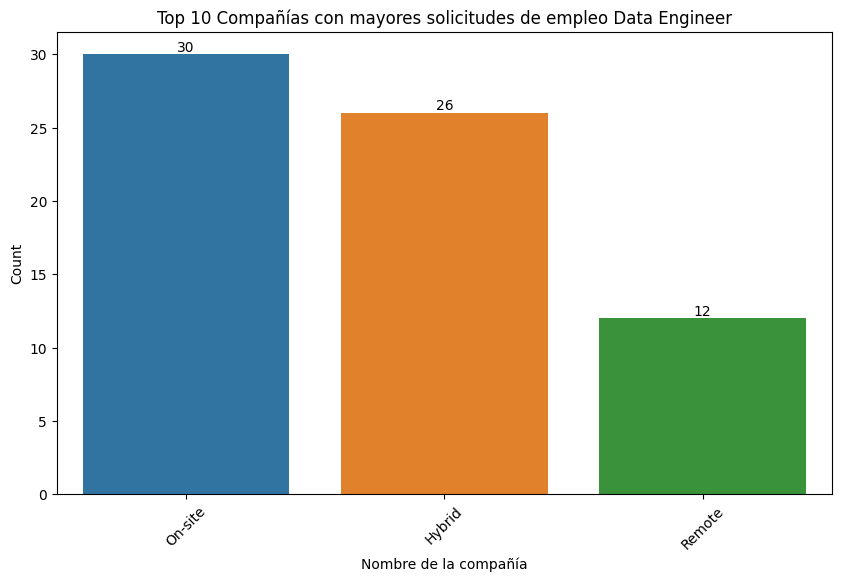

In [312]:
de_work_type_counts = de_df['work_type'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=de_work_type_counts.index, y=de_work_type_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo Data Engineer')

for i, v in enumerate(de_work_type_counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.xticks(rotation=45)
plt.show()

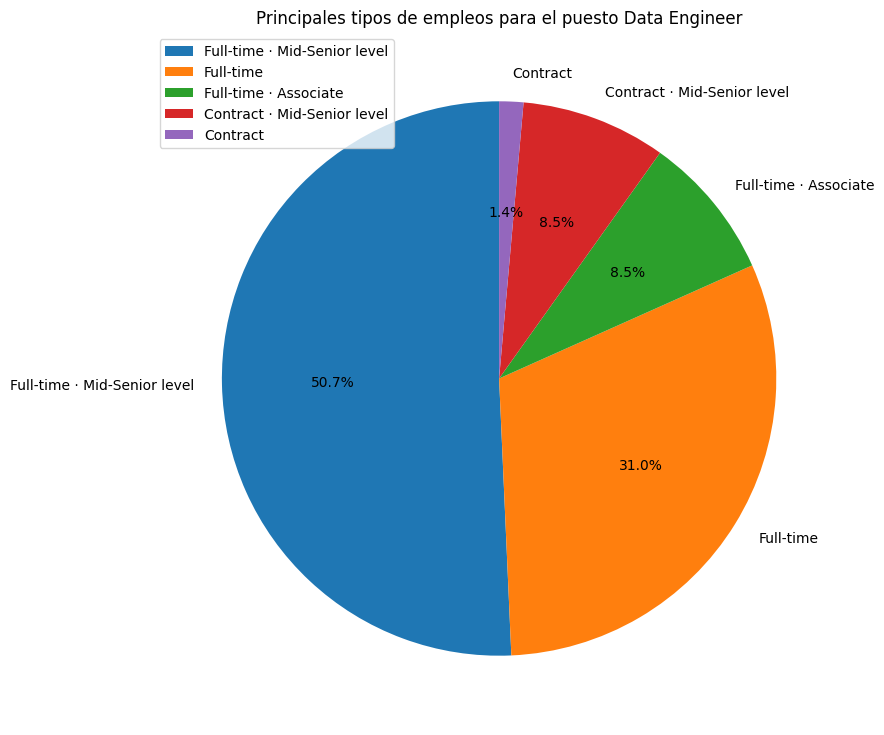

In [313]:
# Obtener los valores y las frecuencias de los tipos de empleo
values_de = de_df.full_time_remote.value_counts().head(5).values
labels_de = de_df.full_time_remote.value_counts().head(5).index

# Crear la gráfica de pastel
plt.figure(figsize=(9, 9))  # Tamaño de la gráfica
plt.pie(values_de, labels=labels_de, autopct='%1.1f%%', startangle=90)

# Agregar título y leyenda
plt.title('Principales tipos de empleos para el puesto Data Engineer')
plt.legend(loc = 'upper left')

# Mostrar la gráfica de pastel
plt.show()

### Data Analyst

<Axes: title={'center': 'Aplicaciones para el puesto Data Analyst'}, xlabel='no_of_application', ylabel='Count'>

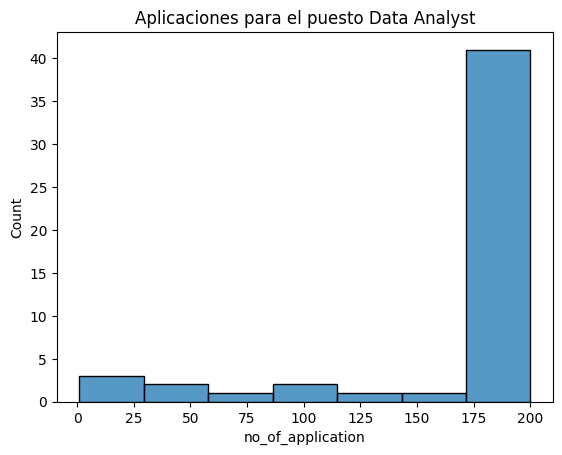

In [314]:
da_df = data[data.job == "Data Analyst"]
plt.title("Aplicaciones para el puesto Data Analyst")
sns.histplot(da_df['no_of_application'])

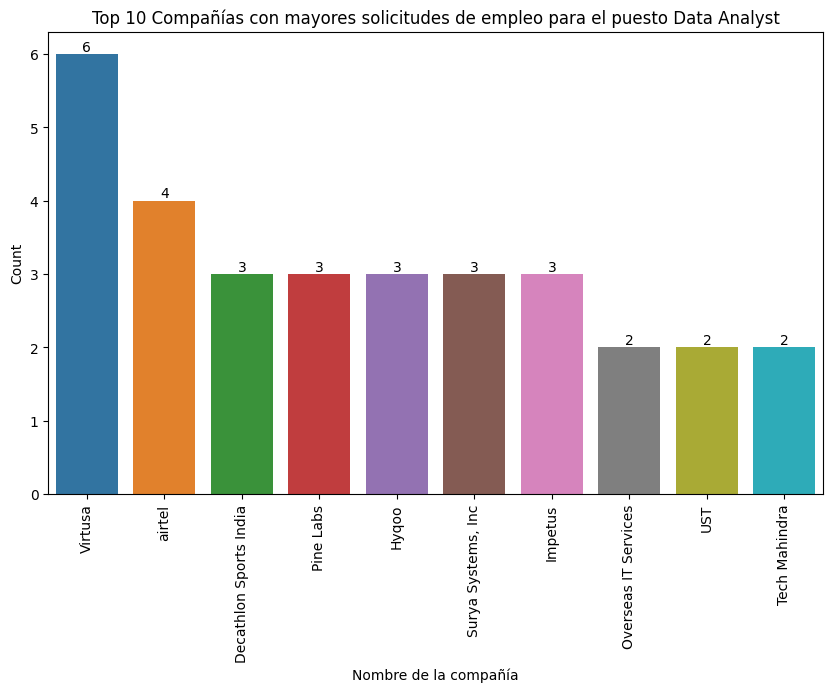

In [315]:
da_company_counts = da_df['company_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=da_company_counts.index, y=da_company_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo para el puesto Data Analyst')

for i, v in enumerate(da_company_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)
plt.show()

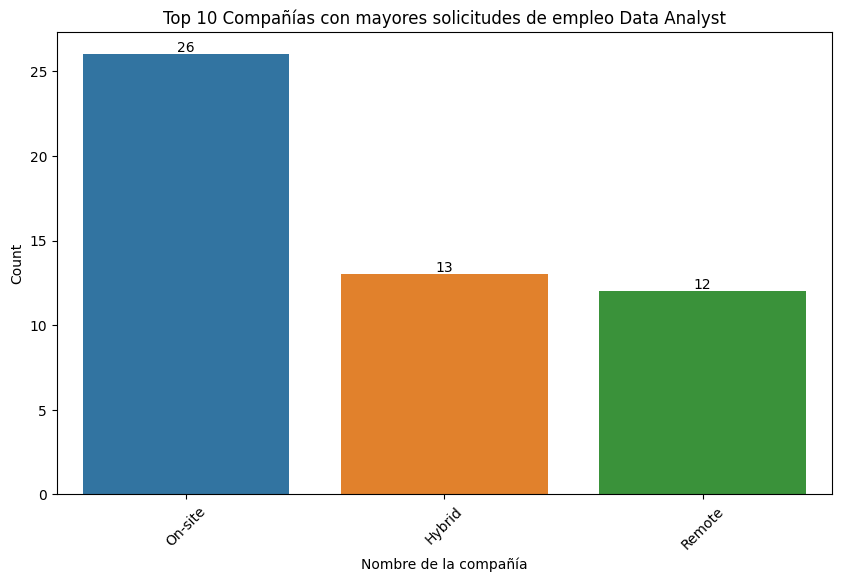

In [316]:
da_work_type_counts = da_df['work_type'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=da_work_type_counts.index, y=da_work_type_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo Data Analyst')

for i, v in enumerate(da_work_type_counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.xticks(rotation=45)
plt.show()

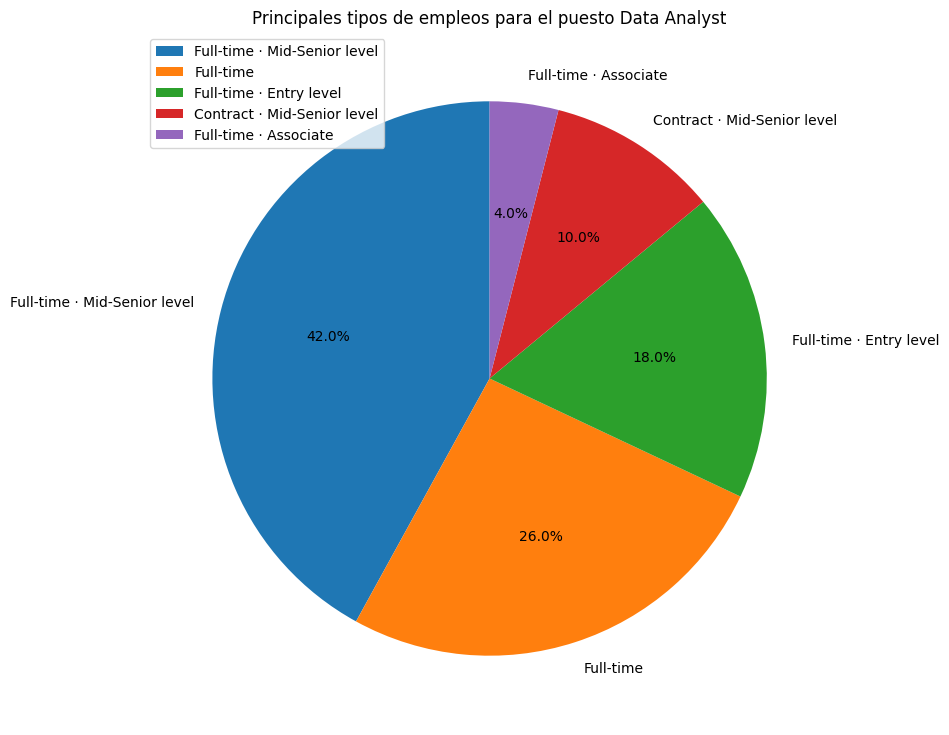

In [317]:
# Obtener los valores y las frecuencias de los tipos de empleo
values_da = da_df.full_time_remote.value_counts().head(5).values
labels_da = da_df.full_time_remote.value_counts().head(5).index

# Crear la gráfica de pastel
plt.figure(figsize=(9, 9))  # Tamaño de la gráfica
plt.pie(values_da, labels=labels_da, autopct='%1.1f%%', startangle=90)

# Agregar título y leyenda
plt.title('Principales tipos de empleos para el puesto Data Analyst')
plt.legend(loc = 'upper left')

# Mostrar la gráfica de pastel
plt.show()

### Salesforce Developer

<Axes: title={'center': 'Aplicaciones para el puesto Salesforce Developer'}, xlabel='no_of_application', ylabel='Count'>

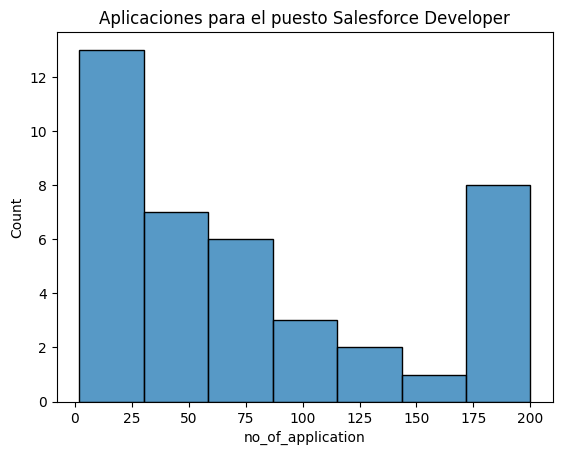

In [318]:
sd_df = data[data.job == "Salesforce Developer"]
plt.title("Aplicaciones para el puesto Salesforce Developer")
sns.histplot(sd_df['no_of_application'])

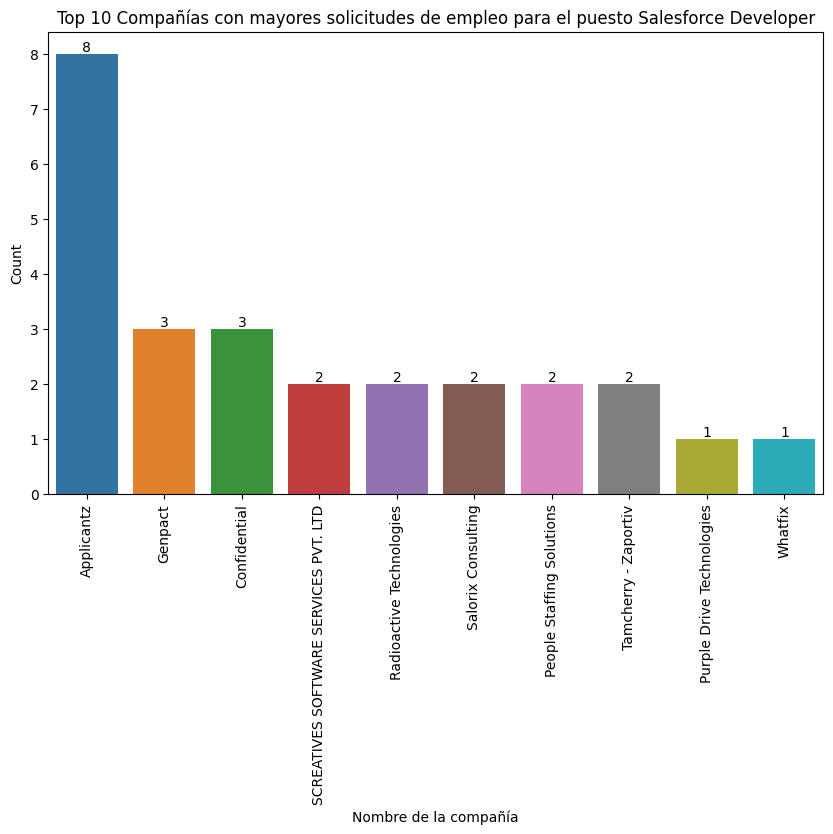

In [319]:
sd_company_counts = sd_df['company_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sd_company_counts.index, y=sd_company_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo para el puesto Salesforce Developer')

for i, v in enumerate(sd_company_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)
plt.show()

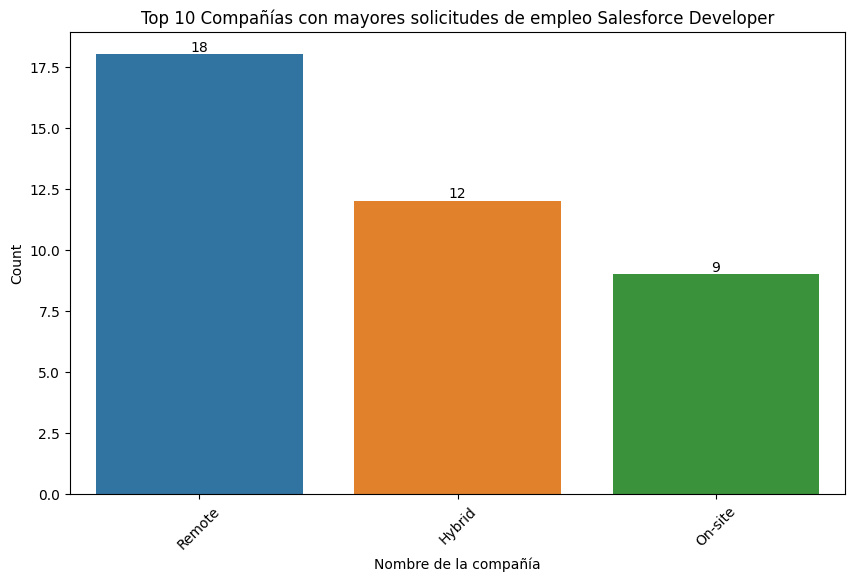

In [320]:
sd_work_type_counts = sd_df['work_type'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sd_work_type_counts.index, y=sd_work_type_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo Salesforce Developer')

for i, v in enumerate(sd_work_type_counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.xticks(rotation=45)
plt.show()

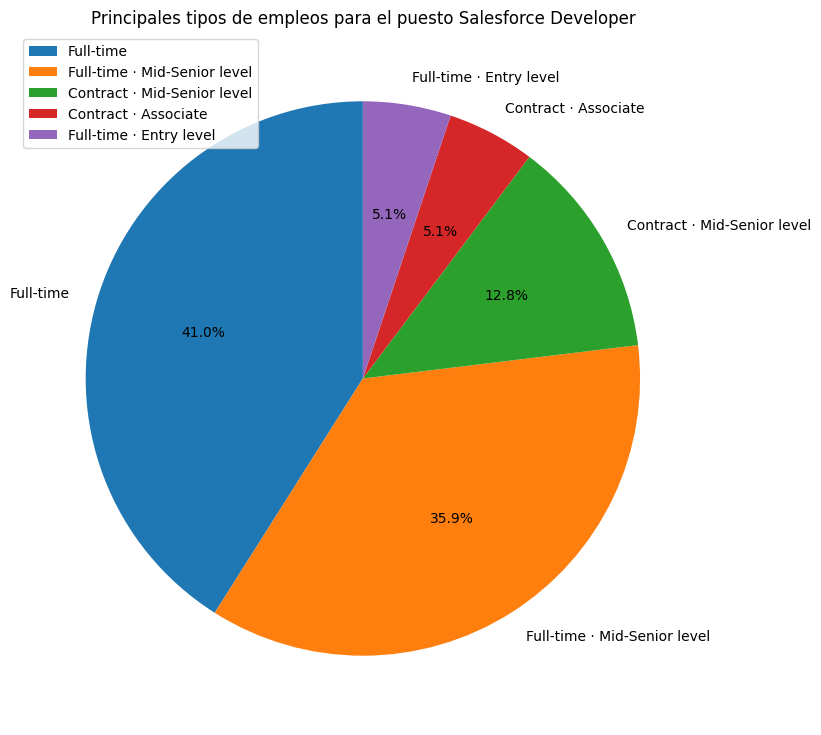

In [321]:
# Obtener los valores y las frecuencias de los tipos de empleo
values_sd = sd_df.full_time_remote.value_counts().head(5).values
labels_sd = sd_df.full_time_remote.value_counts().head(5).index

# Crear la gráfica de pastel
plt.figure(figsize=(9, 9))  # Tamaño de la gráfica
plt.pie(values_sd, labels=labels_sd, autopct='%1.1f%%', startangle=90)

# Agregar título y leyenda
plt.title('Principales tipos de empleos para el puesto Salesforce Developer')
plt.legend(loc = 'upper left')

# Mostrar la gráfica de pastel
plt.show()

### Senior Business Analyst

<Axes: title={'center': 'Aplicaciones para el puesto Senior Business Analyst'}, xlabel='no_of_application', ylabel='Count'>

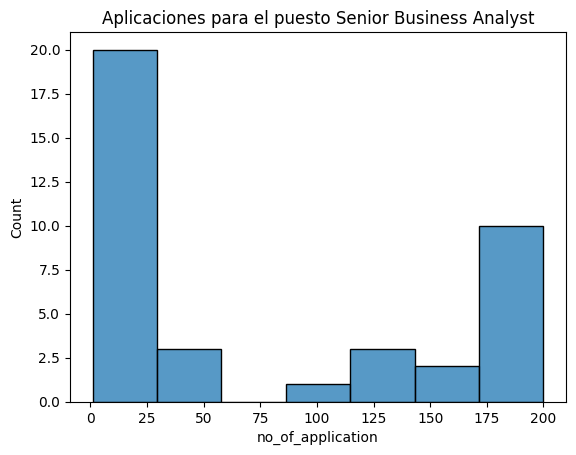

In [322]:
sba_df = data[data.job == "Senior Business Analyst"]
plt.title("Aplicaciones para el puesto Senior Business Analyst")
sns.histplot(sba_df['no_of_application'])

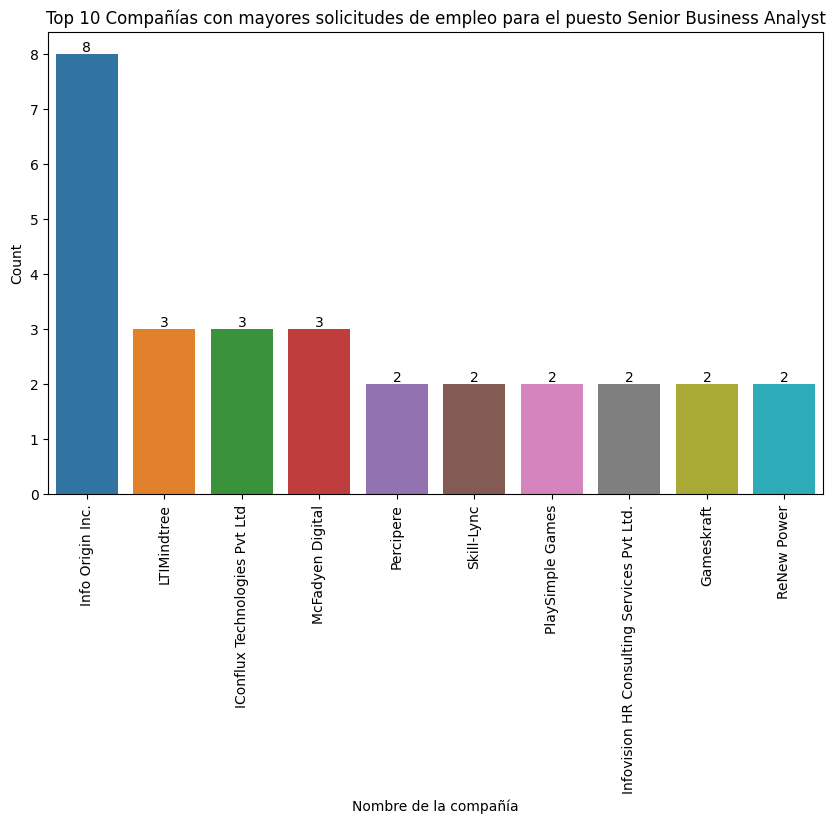

In [323]:
sba_company_counts = sba_df['company_name'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sba_company_counts.index, y=sba_company_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo para el puesto Senior Business Analyst')

for i, v in enumerate(sba_company_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)
plt.show()

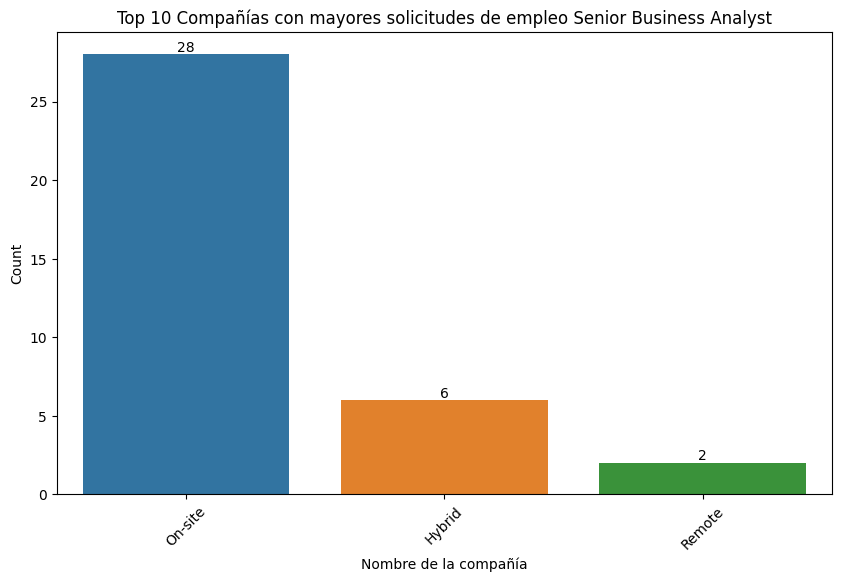

In [324]:
sba_work_type_counts = sba_df['work_type'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sba_work_type_counts.index, y=sba_work_type_counts.values)
plt.xlabel('Nombre de la compañía')
plt.ylabel('Count')
plt.title('Top 10 Compañías con mayores solicitudes de empleo Senior Business Analyst')

for i, v in enumerate(sba_work_type_counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')

plt.xticks(rotation=45)
plt.show()

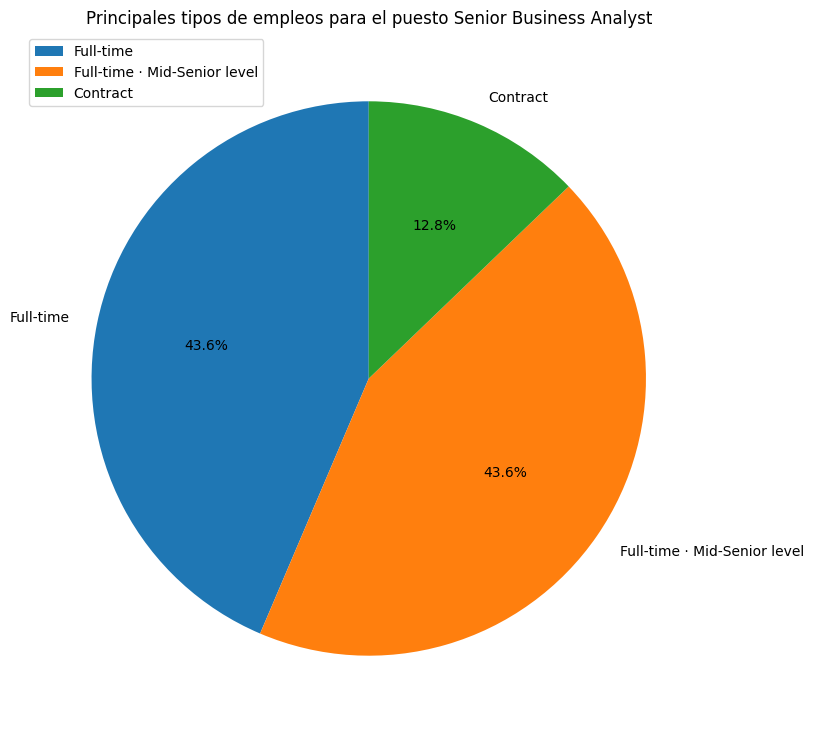

In [330]:
# Obtener los valores y las frecuencias de los tipos de empleo
values_sba = sba_df.full_time_remote.value_counts().head(5).values
labels_sba = sba_df.full_time_remote.value_counts().head(5).index

# Crear la gráfica de pastel
plt.figure(figsize=(9, 9))  # Tamaño de la gráfica
plt.pie(values_sba, labels=labels_sba, autopct='%1.1f%%', startangle=90)

# Agregar título y leyenda
plt.title('Principales tipos de empleos para el puesto Senior Business Analyst')
plt.legend(loc = 'upper left')

# Mostrar la gráfica de pastel
plt.show()